<a href="https://colab.research.google.com/github/mehrahmad9033/DataScience/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [58]:
#Loading Data
data=np.genfromtxt('https://hastie.su.domains/Papers/LARS/diabetes.data',delimiter='\t', dtype=None, names=True, encoding=None)
df=pd.DataFrame(data)


In [5]:
 #Analyzing Data Quality
print('*********    Describe    ****************')
print(df.describe())
print('_______________________________')
print('**********    Shape    ***************')
print(df.shape)
print('_______________________________')
print('**********    Null Sum    ***************')
print(df.isnull().sum())
print('_______________________________')
print('**********   Duplicate Rows    ***************')
print(df.duplicated().sum())


*********    Describe    ****************
              AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6           Y  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.2

# IQR (Inter Quartile Range)
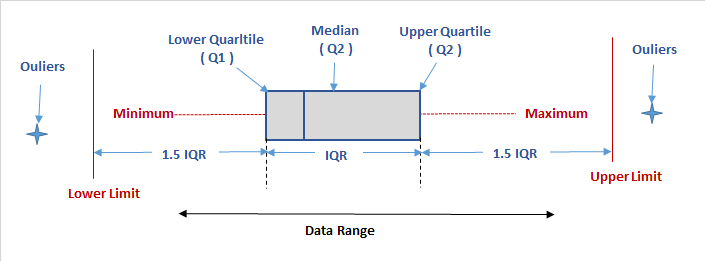

# Z-Score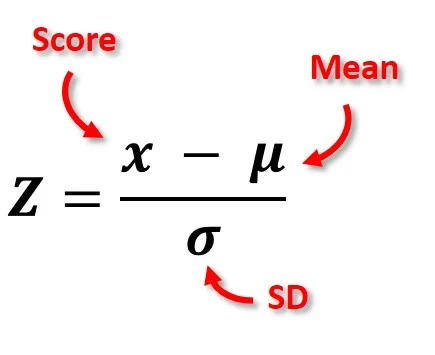

outlier: (AGE) 0
**** Z Score  ***********
AGE: 0 outliers (z-score method)


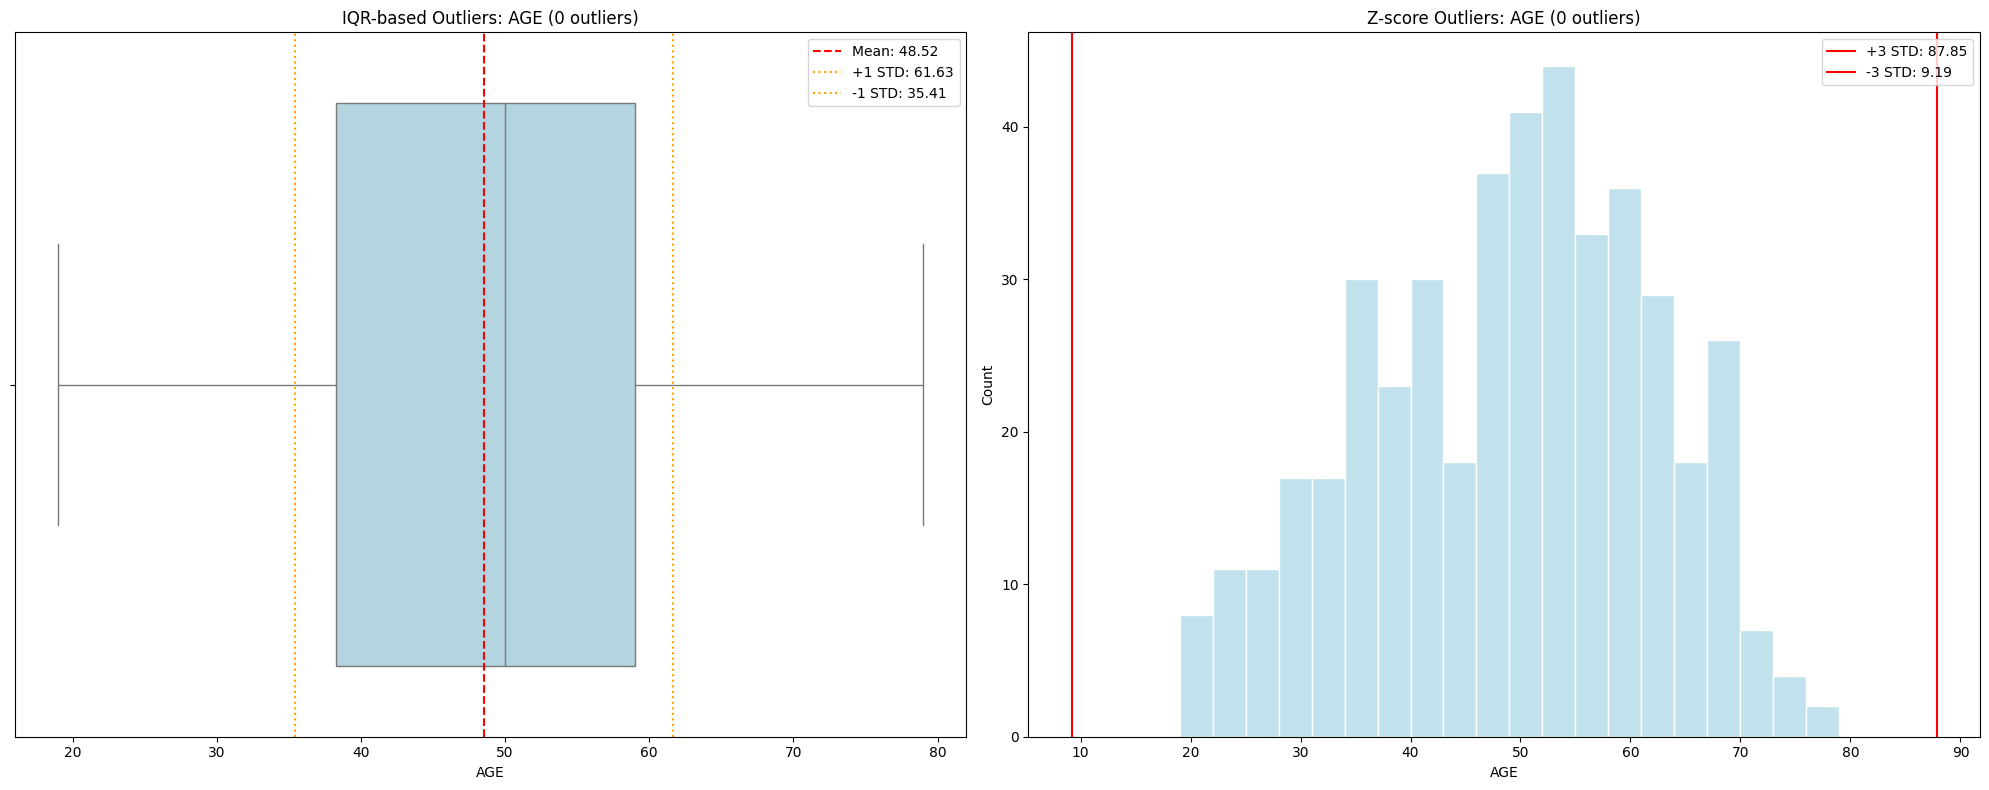

outlier: (SEX) 0
**** Z Score  ***********
SEX: 0 outliers (z-score method)


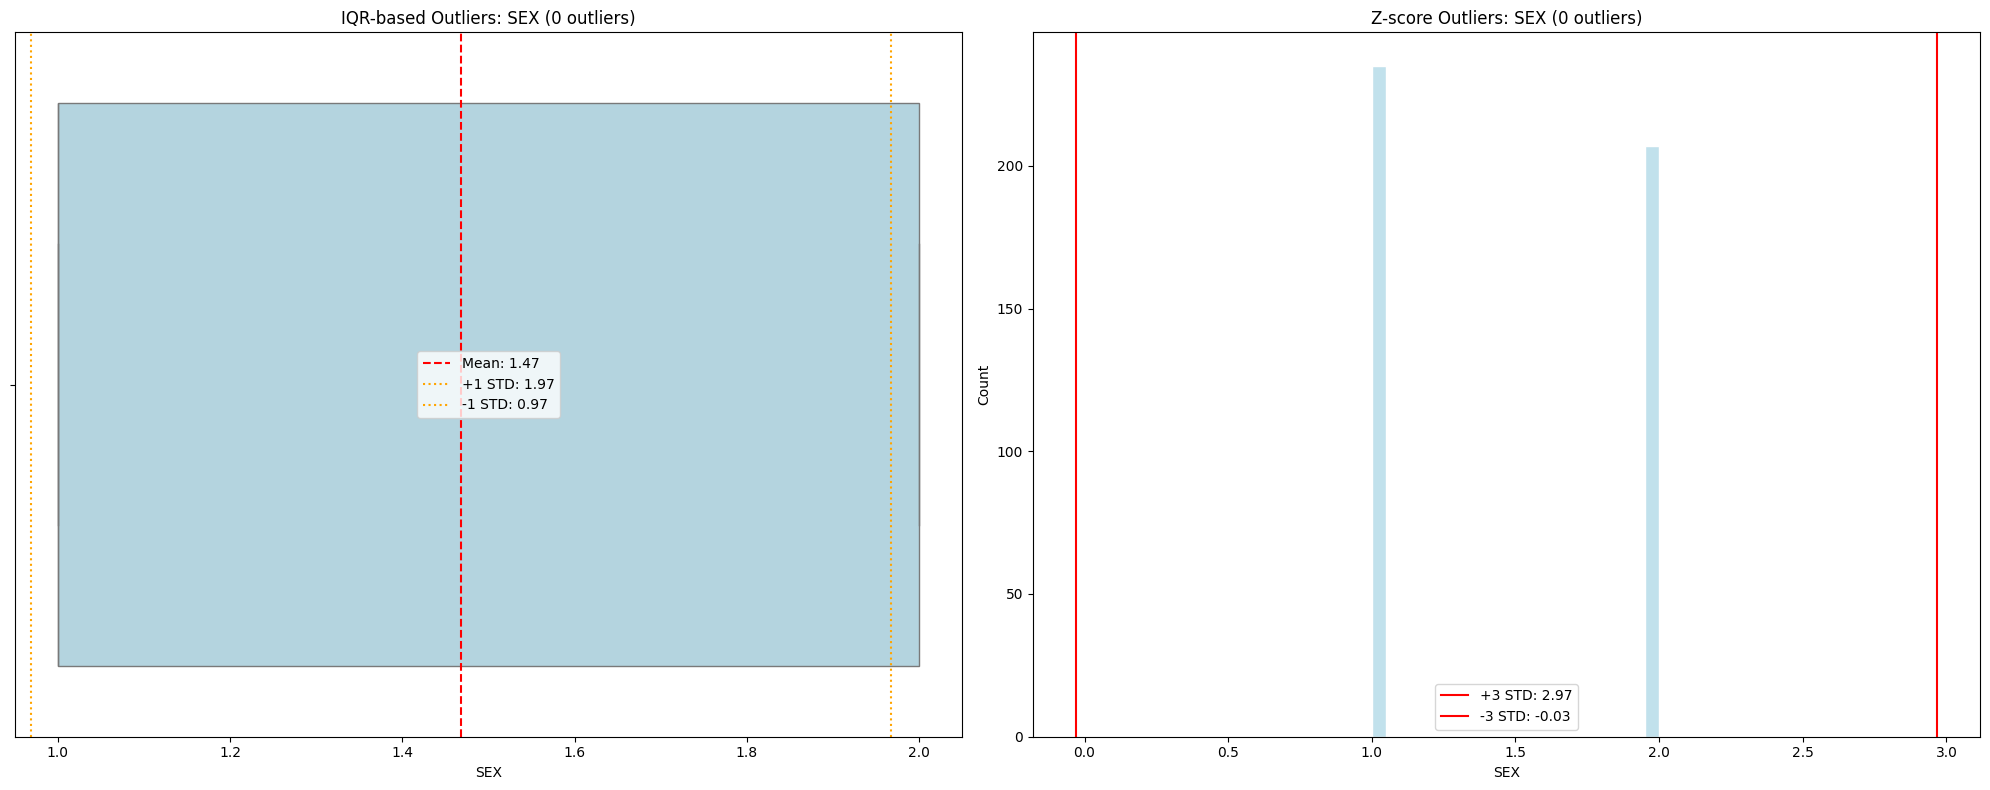

outlier: (BMI) 3
**** Z Score  ***********
BMI: 2 outliers (z-score method)


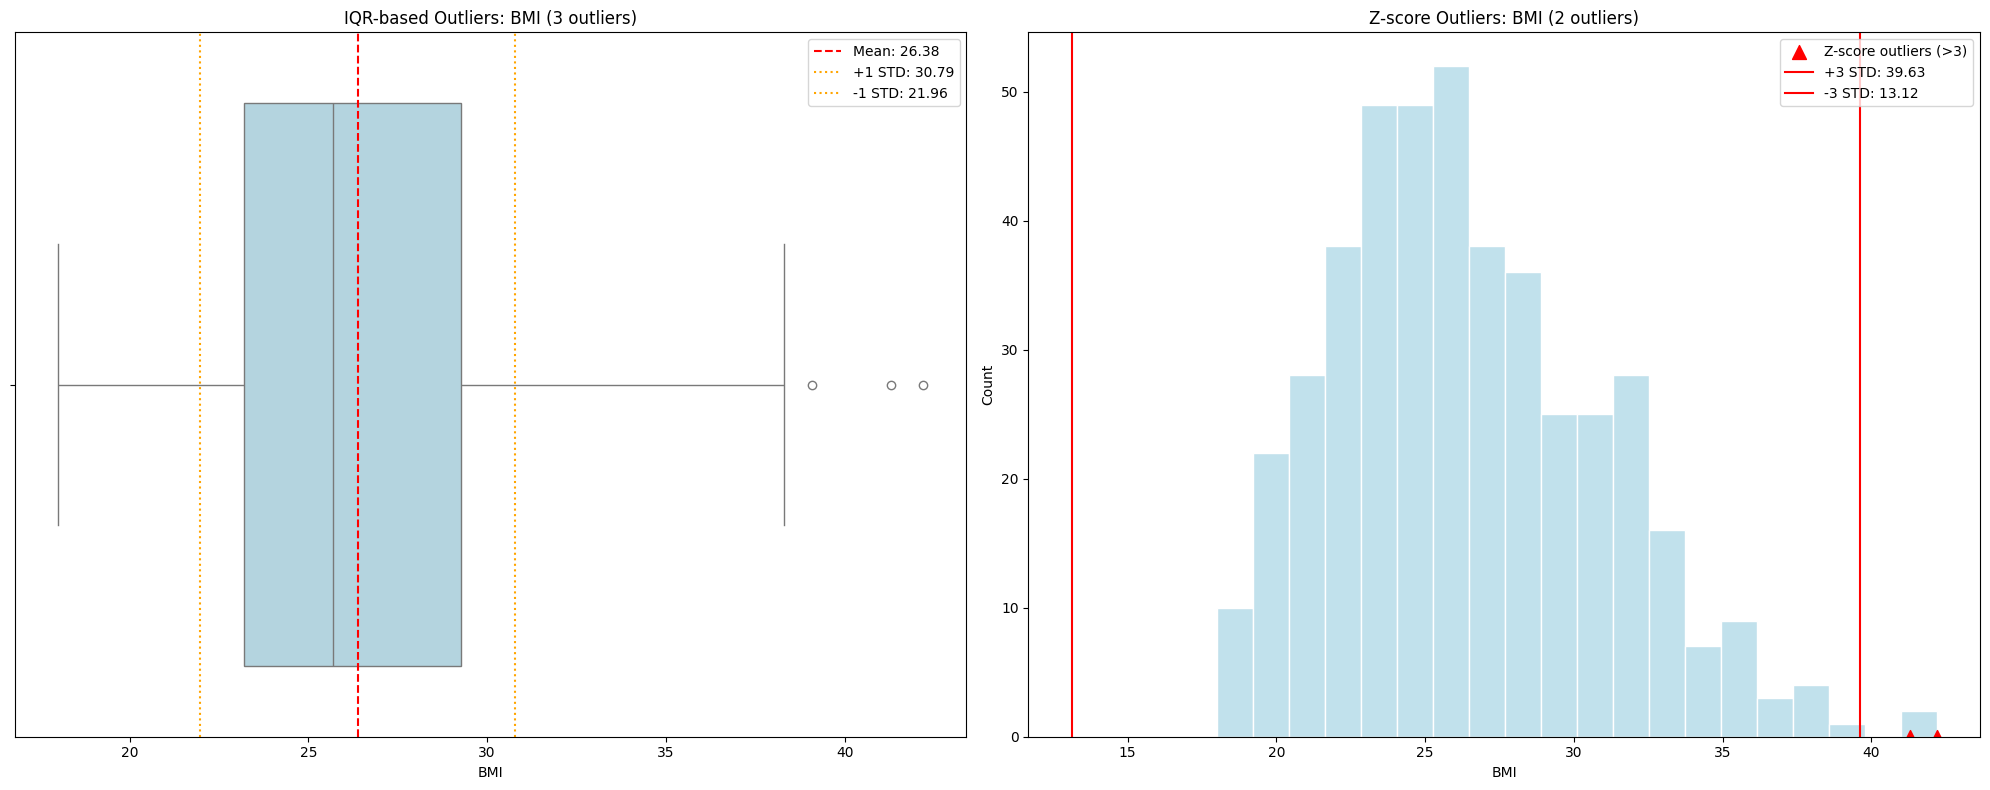

outlier: (BP) 0
**** Z Score  ***********
BP: 0 outliers (z-score method)


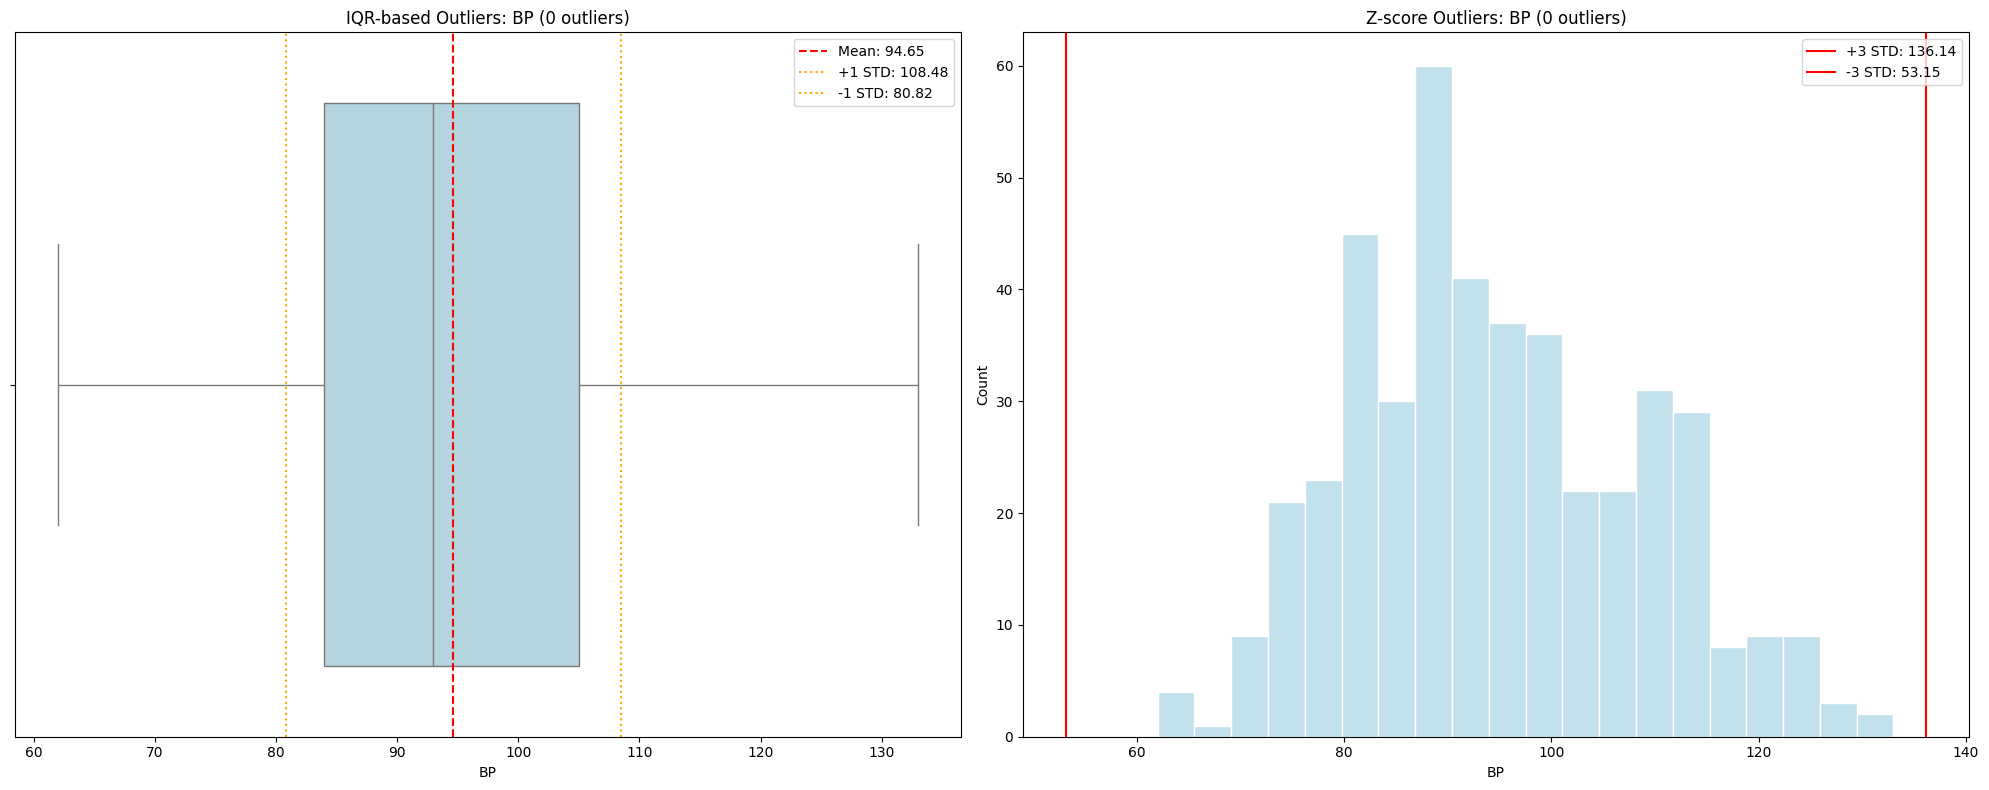

outlier: (S1) 8
**** Z Score  ***********
S1: 2 outliers (z-score method)


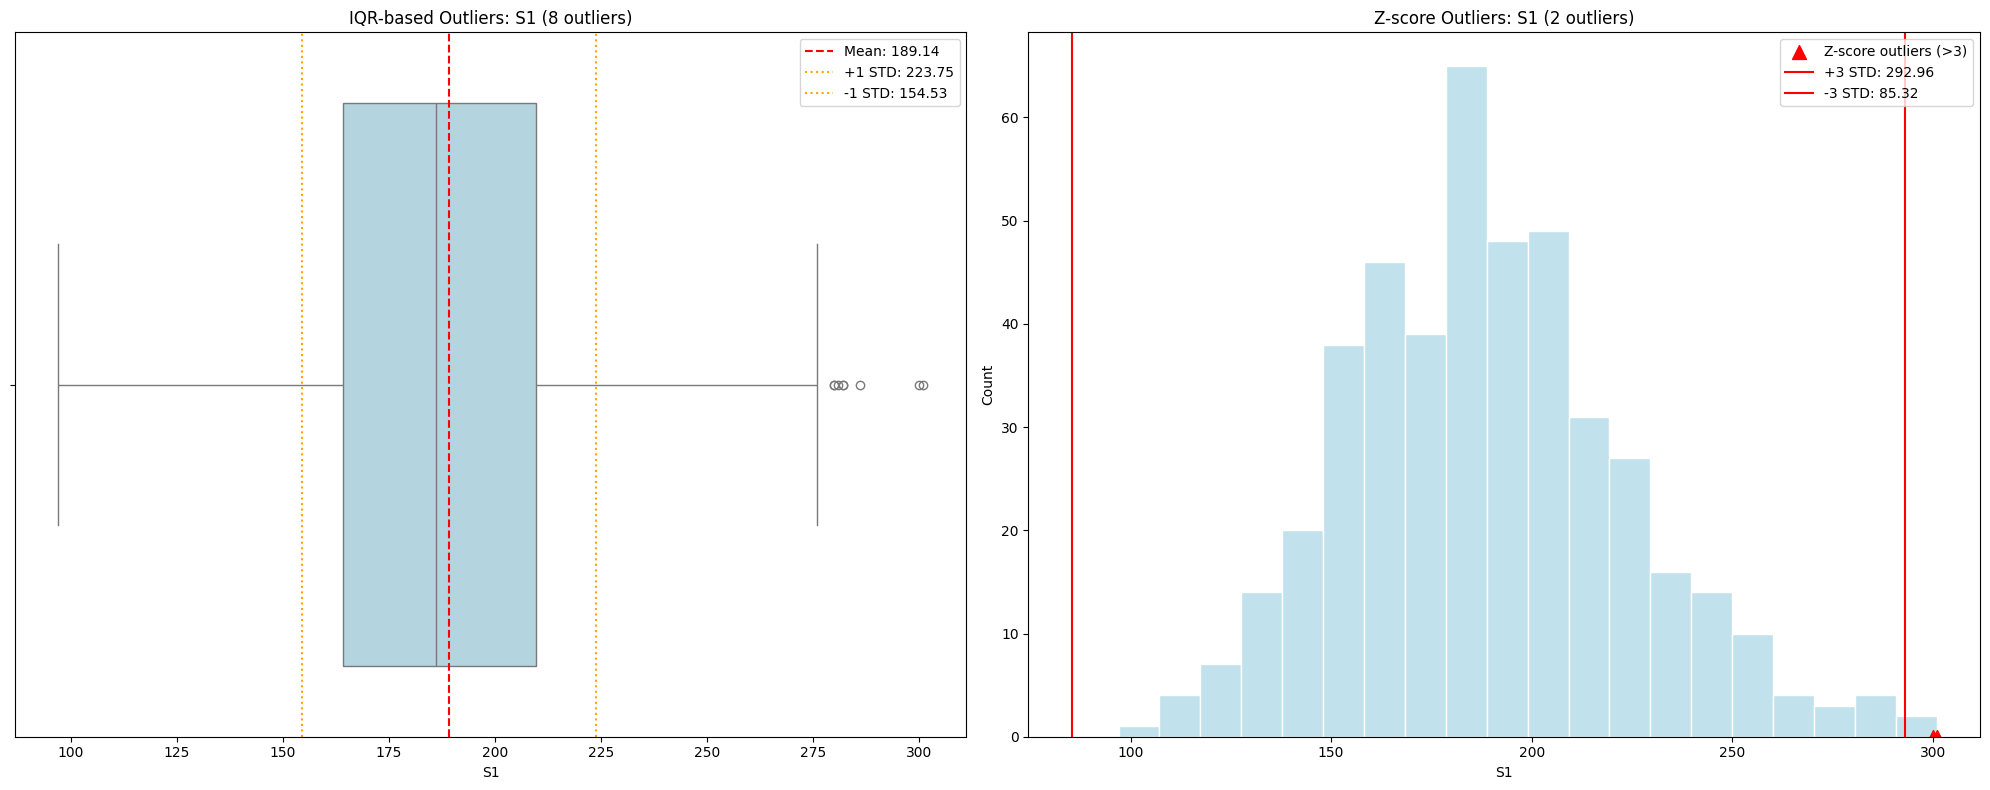

outlier: (S2) 7
**** Z Score  ***********
S2: 2 outliers (z-score method)


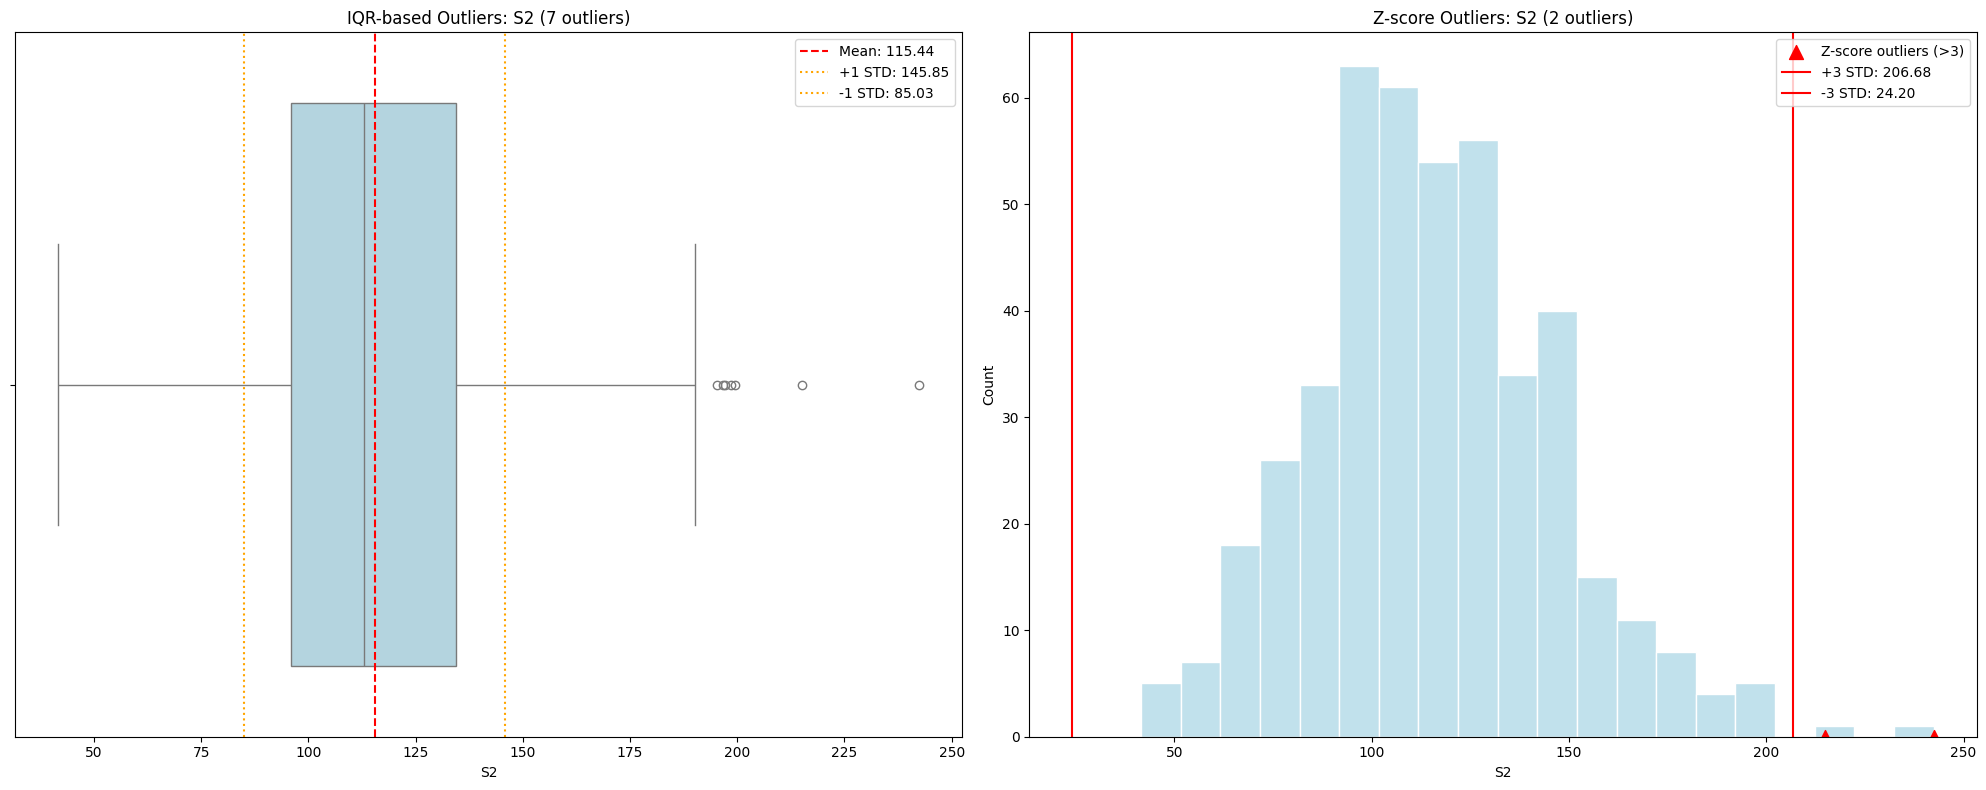

outlier: (S3) 7
**** Z Score  ***********
S3: 5 outliers (z-score method)


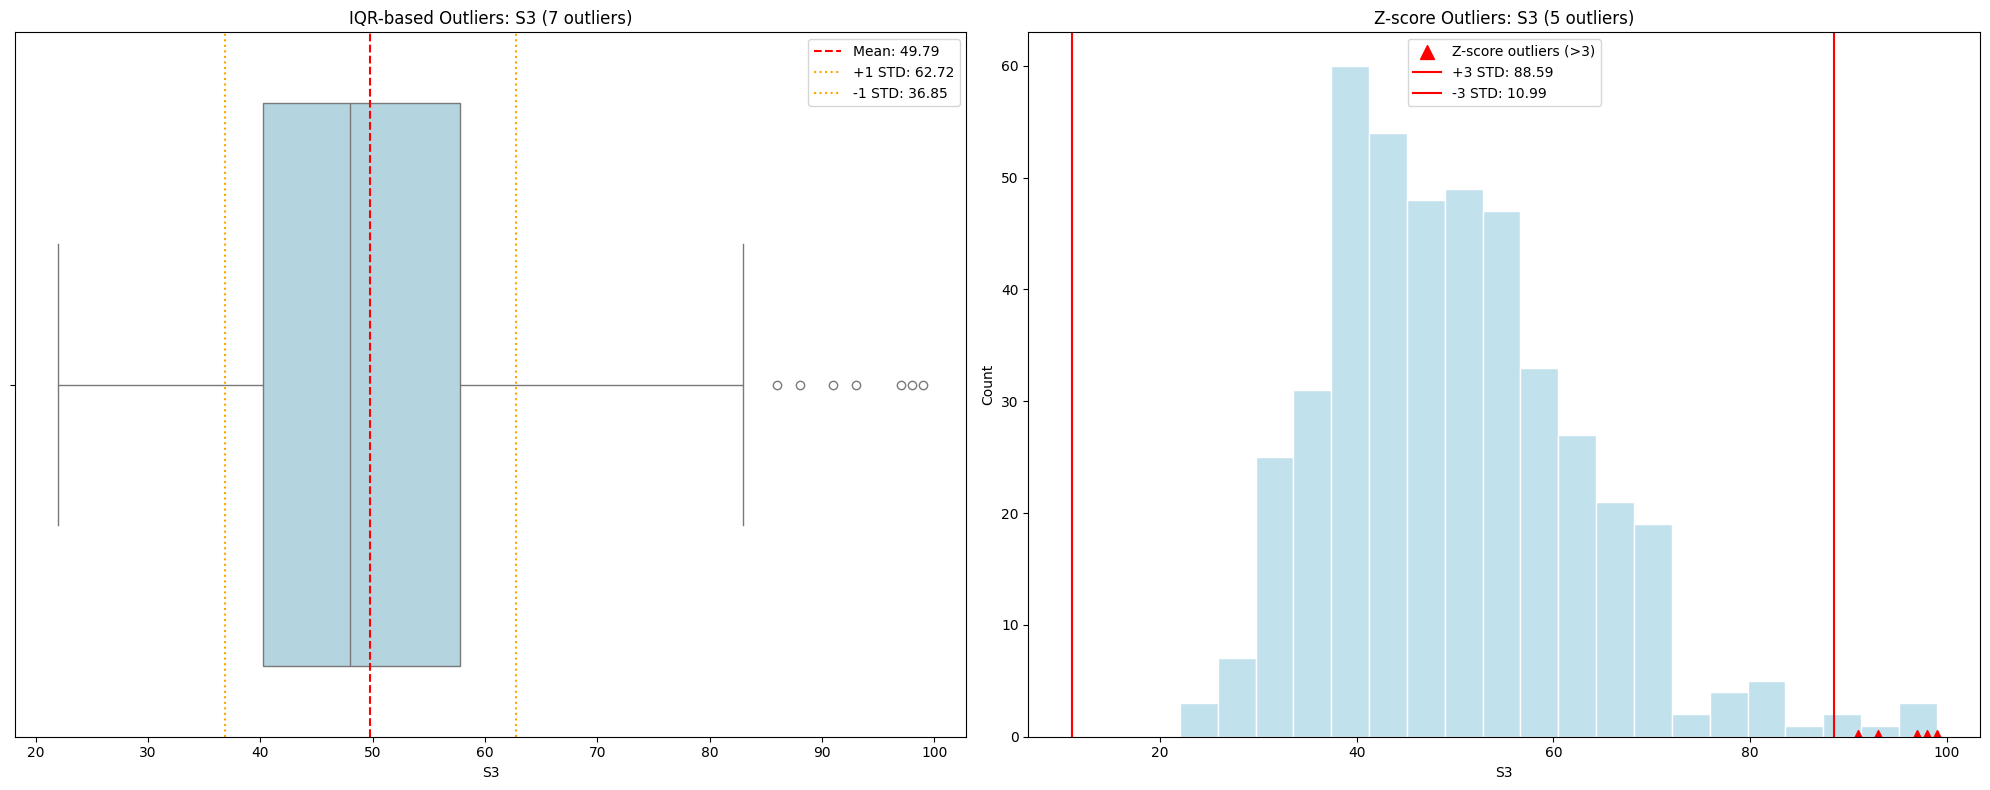

outlier: (S4) 2
**** Z Score  ***********
S4: 4 outliers (z-score method)


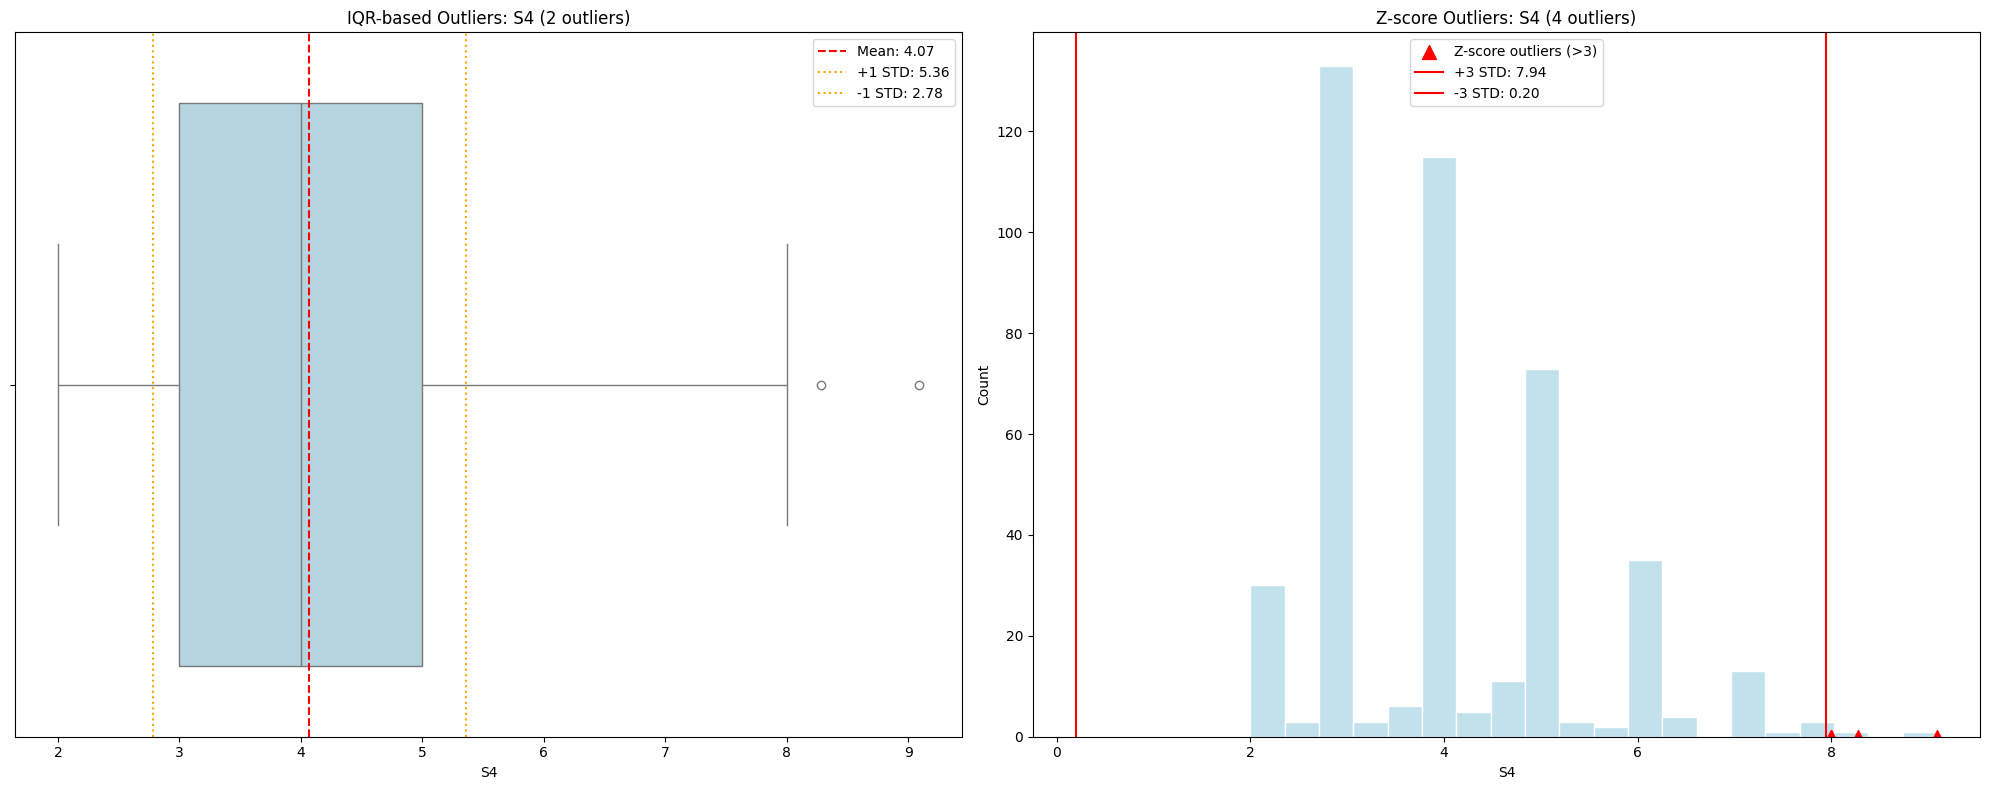

outlier: (S5) 4
**** Z Score  ***********
S5: 0 outliers (z-score method)


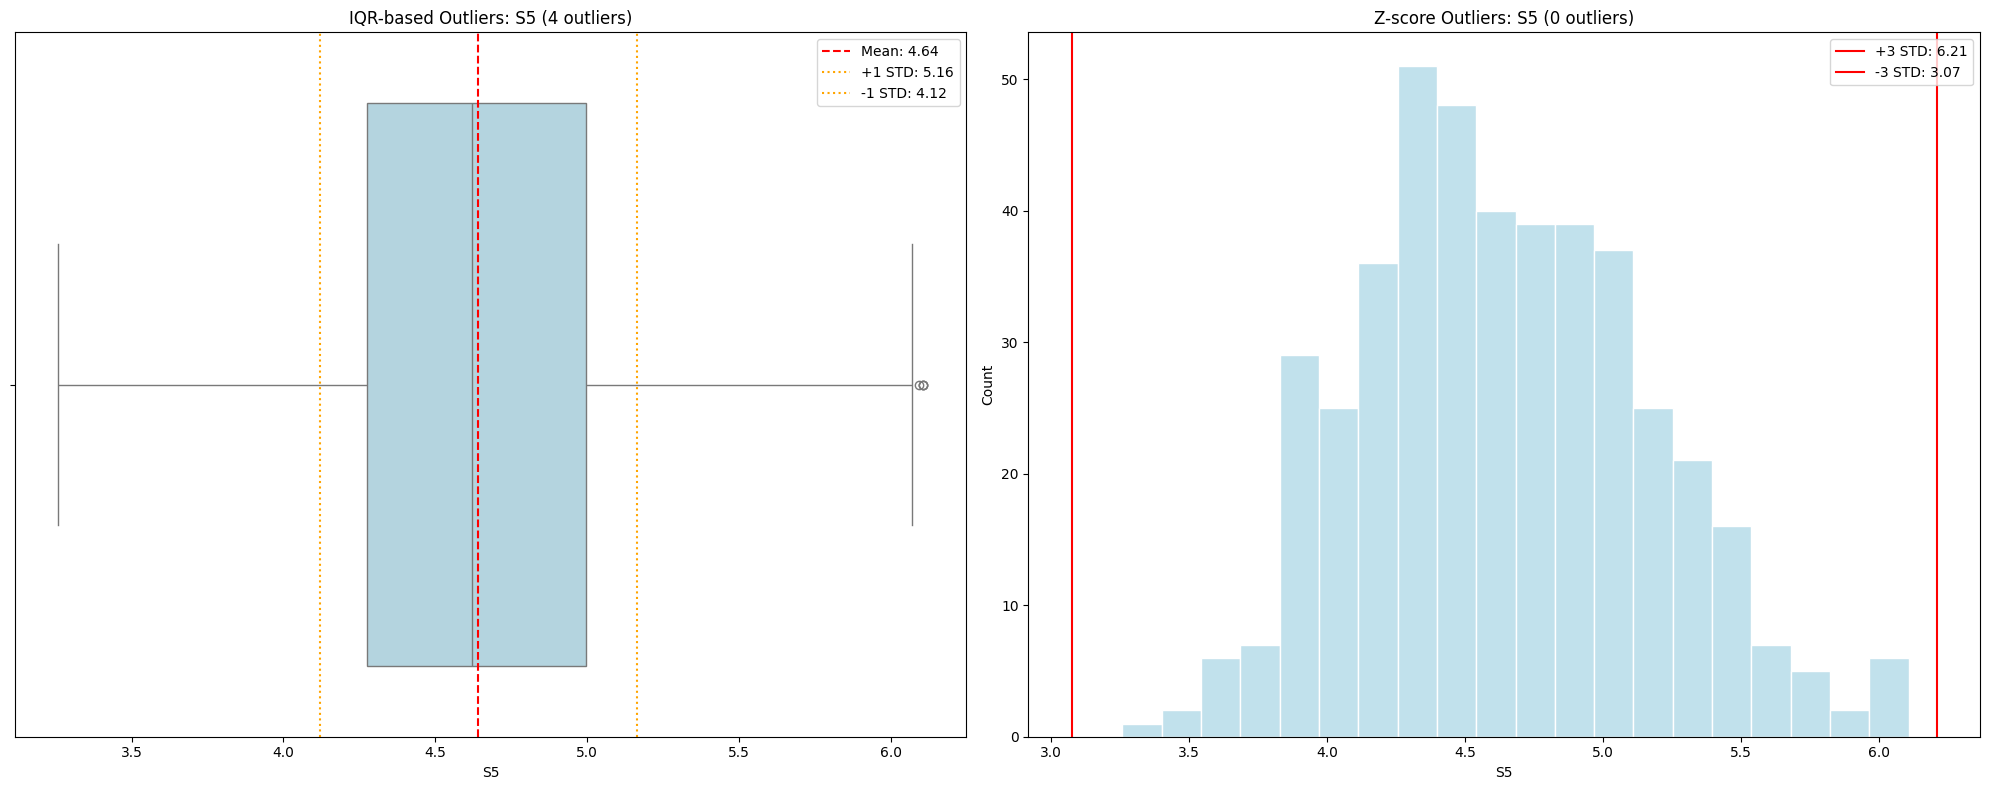

outlier: (S6) 9
**** Z Score  ***********
S6: 0 outliers (z-score method)


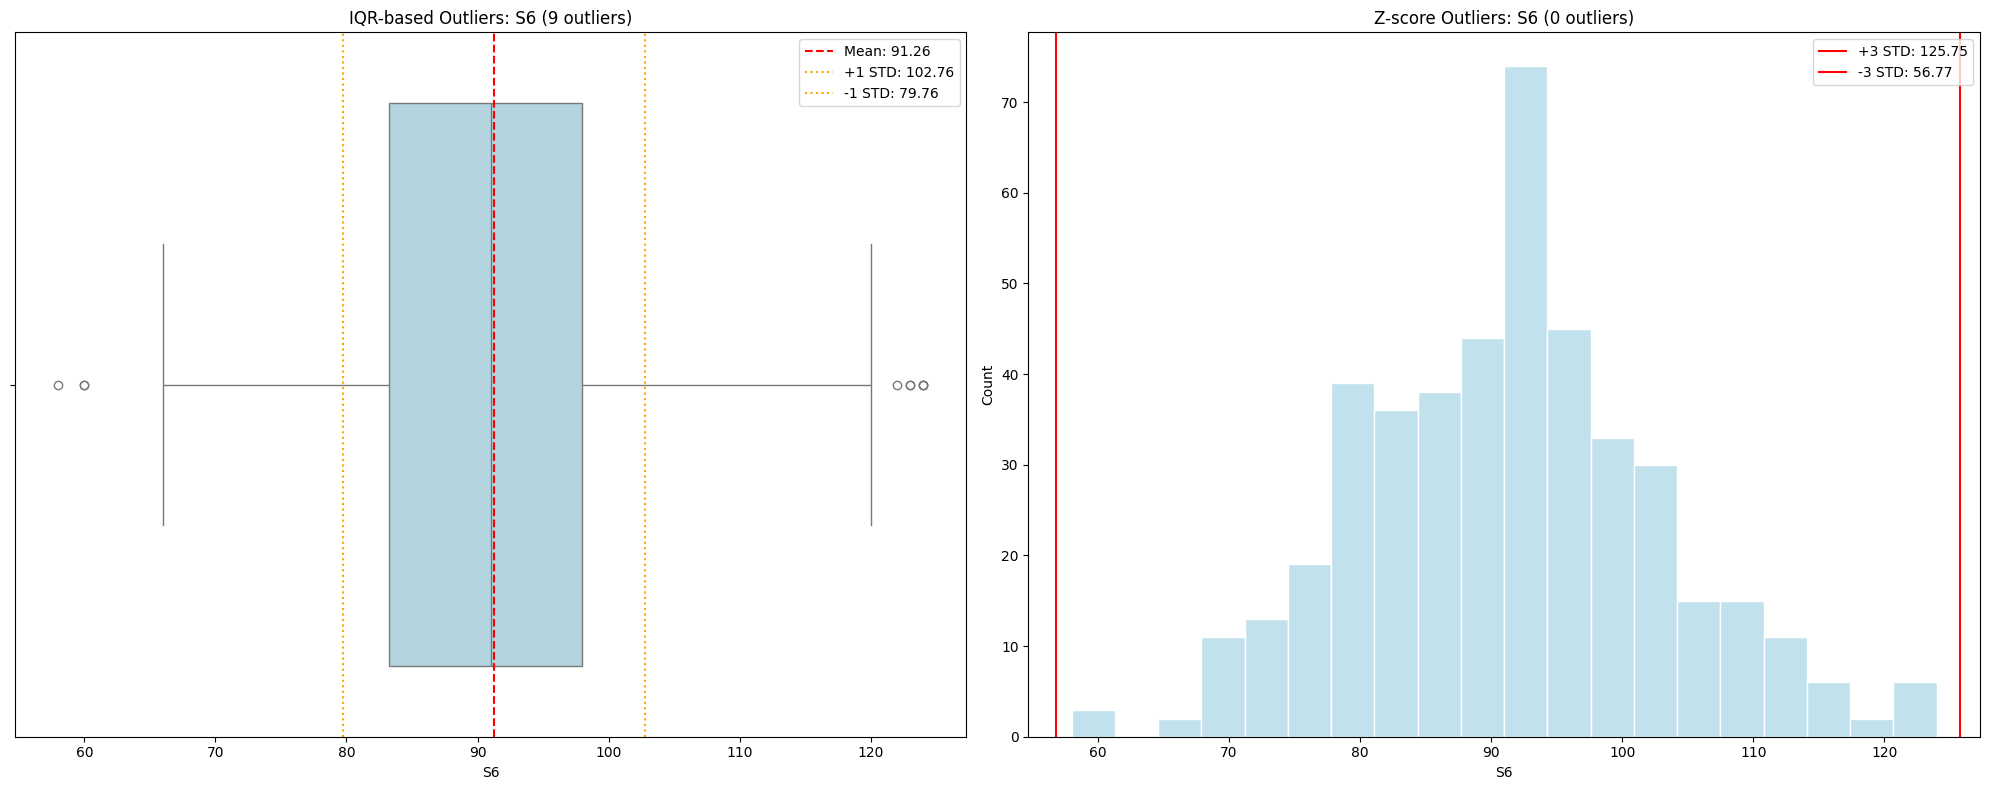

outlier: (Y) 0
**** Z Score  ***********
Y: 0 outliers (z-score method)


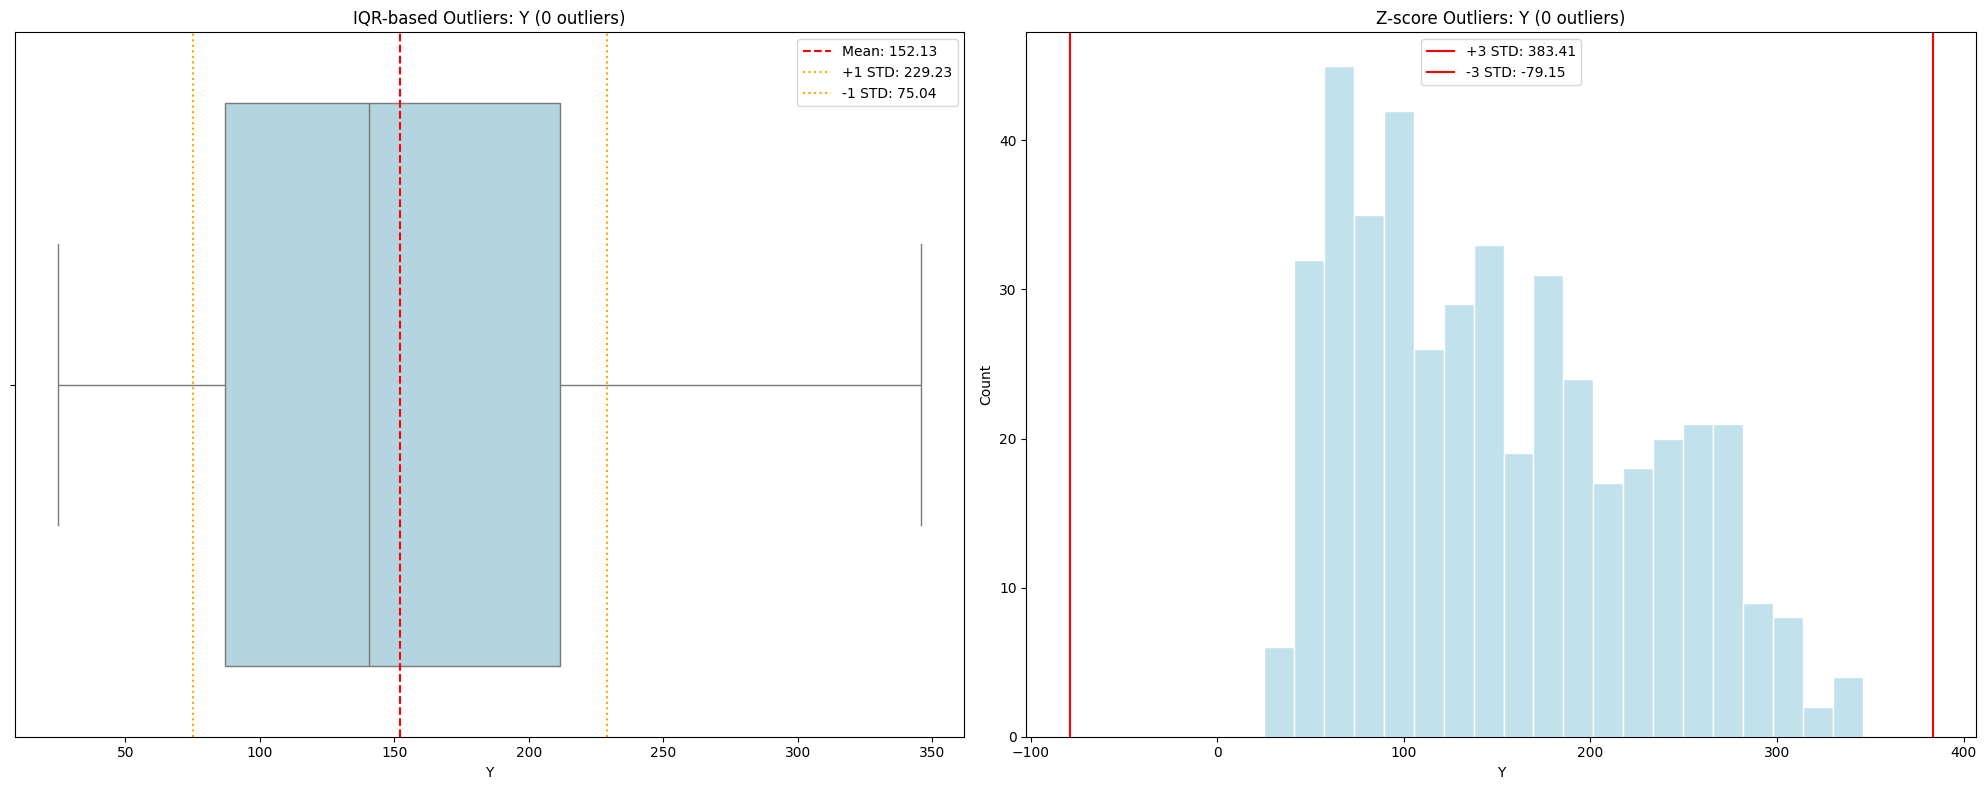

In [18]:
# Outliers
outlier_quantiles={}
outlier_zscore={}
i=0
for column in df.columns:
    i+=1
    Q1=df[column].quantile(0.25)
    Q2=df[column].quantile(0.75)
    Q3=Q2-Q1
    #print('---> ',column)
    #print('Q1: ',Q1,'Q2: ',Q2,'Q3: ',Q3)
    lower_b=Q1-1.5*Q3
    upper_b=Q2+1.5*Q3
    #print(df[column])
    #print('Lower Bound: ',lower_b,'Upper Bound: ',upper_b)

    outliers_count = df[(df[column] < lower_b) | (df[column] > upper_b)].shape[0]
    print(f'outlier: ({column}) {outliers_count}')
    outlier_quantiles[column]=df[(df[column]<lower_b) | (df[column]>upper_b)].shape[0];

    print('**** Z Score  ***********')
    z_scores = np.abs(stats.zscore(df[column]))
    outlier_zscore[column] = np.sum(z_scores > 3)  # Count values with z-score > 3
    print(f"{column}: {outlier_zscore[column]} outliers (z-score method)")


    # plt.figure(figsize=(30,8))
    # plt.subplot(3, 4, i + 1)
    # mean_value = df[column].mean()
    # std_value = df[column].std()
    # sn.boxplot(x=df[column], color='lightblue')
    # plt.title(f'Boxplot of {column}')
    # plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    # plt.axvline(mean_value + std_value, color='orange', linestyle=':', label=f'+1 STD: {mean_value + std_value:.2f}')
    # plt.axvline(mean_value - std_value, color='orange', linestyle=':', label=f'-1 STD: {mean_value - std_value:.2f}')
    # plt.legend()
    # plt.tight_layout()
    # plt.show()
    plt.figure(figsize=(20, 8))

    #First Plot
    plt.subplot(1, 2, 1)
    mean_value = df[column].mean()
    std_value = df[column].std()
    sn.boxplot(x=df[column], color='lightblue')
    plt.title(f'IQR-based Outliers: {column} ({outlier_quantiles[column]} outliers)')
    plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axvline(mean_value + std_value, color='orange', linestyle=':', label=f'+1 STD: {mean_value + std_value:.2f}')
    plt.axvline(mean_value - std_value, color='orange', linestyle=':', label=f'-1 STD: {mean_value - std_value:.2f}')
    plt.legend()


    #2
    plt.subplot(1, 2, 2)
    z_scores = np.abs(stats.zscore(df[column]))
    z_outlier_mask = z_scores > 3

    #red is outlier
    colors = np.array(['lightblue'] * len(df[column]))
    colors[z_outlier_mask] = 'red'

    sn.histplot(df[column], bins=20, color='lightblue', edgecolor='white')
    if np.sum(z_outlier_mask) > 0:
        outlier_values = df[column][z_outlier_mask]
        plt.scatter(outlier_values, [0] * len(outlier_values),
                   color='red', marker='^', s=100, label='Z-score outliers (>3)')

    # Z-score  lines
    plt.axvline(mean_value + 3*std_value, color='red', linestyle='-', label=f'+3 STD: {mean_value + 3*std_value:.2f}')
    plt.axvline(mean_value - 3*std_value, color='red', linestyle='-', label=f'-3 STD: {mean_value - 3*std_value:.2f}')
    plt.title(f'Z-score Outliers: {column} ({outlier_zscore[column]} outliers)')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [20]:
# Data Transformation
column_dtypes=df.dtypes
column_info = []
category_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in df.columns:
    data_type = str(column_dtypes[col])
    column_type = "Categorical" if col in category_columns else "Numeric"
    column_info.append({
        "Column Name": col,
        "Data Type": data_type,
        "Column Type": column_type
    })

column_table = pd.DataFrame(column_info)
print("Data Column Information:")
print(column_table)

print("\nSummary:")
print(f"Total Columns: {len(df.columns)}")
print(f"Categorical Columns: {len(category_columns)}")
print(f"Numeric Columns: {len(numeric_columns)}")

Data Column Information:
   Column Name Data Type Column Type
0          AGE     int64     Numeric
1          SEX     int64     Numeric
2          BMI   float64     Numeric
3           BP   float64     Numeric
4           S1     int64     Numeric
5           S2   float64     Numeric
6           S3   float64     Numeric
7           S4   float64     Numeric
8           S5   float64     Numeric
9           S6     int64     Numeric
10           Y     int64     Numeric

Summary:
Total Columns: 11
Categorical Columns: 0
Numeric Columns: 11


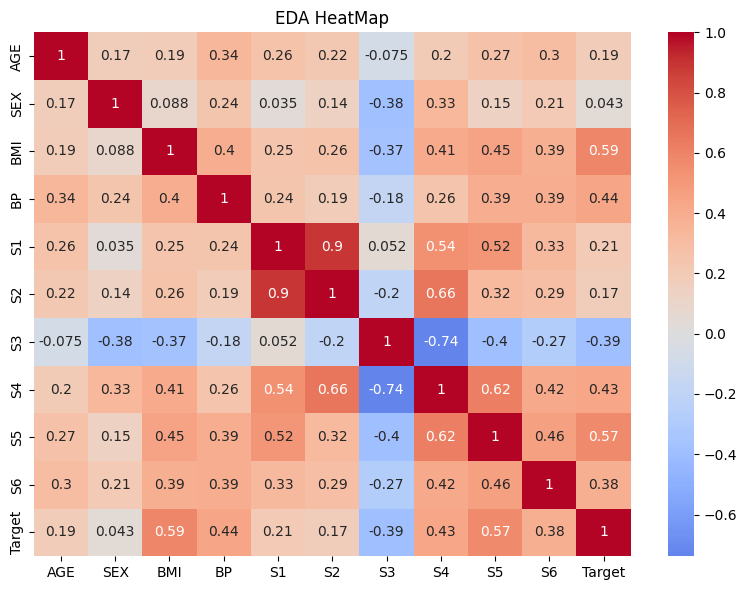

In [ ]:
# EDA (Exploratory data analysis)
df=df.rename(columns={'Y':'Target'})
cor_matrix=df.corr()
plt.figure(figsize=(8,6))
sn.heatmap(cor_matrix,annot=True,cmap='coolwarm',center=0)
plt.title('EDA HeatMap')
plt.tight_layout()
plt.show()





In [ ]:
#Target corelations
target_correlations = cor_matrix['Target'].abs().sort_values(ascending=False)
print('Important Featues for target corelations')
print(target_correlations)

Important Featues for target corelations
Target    1.000000
BMI       0.586450
S5        0.565883
BP        0.441482
S4        0.430453
S3        0.394789
S6        0.382483
S1        0.212022
AGE       0.187889
S2        0.174054
SEX       0.043062
Name: Target, dtype: float64


In [21]:
# Limitations of Data
print("DataSet Sample is small : ",{len(df)})
print("********* Following are highly corelated items. Perform PCA or removal techniques **********")
correlation_matrix = df.corr()
high_corr = np.where(np.abs(correlation_matrix) > 0.7)
high_corr = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) for x, y in zip(*high_corr) if x != y]
for feat1, feat2, corr in high_corr:
    print(f"{feat1} - {feat2}: {corr:.3f}")




DataSet Sample is small :  {442}
********* Following are highly corelated items. Perform PCA or removal techniques **********
S1 - S2: 0.897
S2 - S1: 0.897
S3 - S4: -0.738
S4 - S3: -0.738


*********    Variance Inflation Factor    ****************
   Feature         VIF
0    const  685.773603
1      AGE    1.217307
2      SEX    1.278071
3      BMI    1.509437
4       BP    1.459428
5       S1   59.202510
6       S2   39.193370
7       S3   15.402156
8       S4    8.890986
9       S5   10.075967
10      S6    1.484623


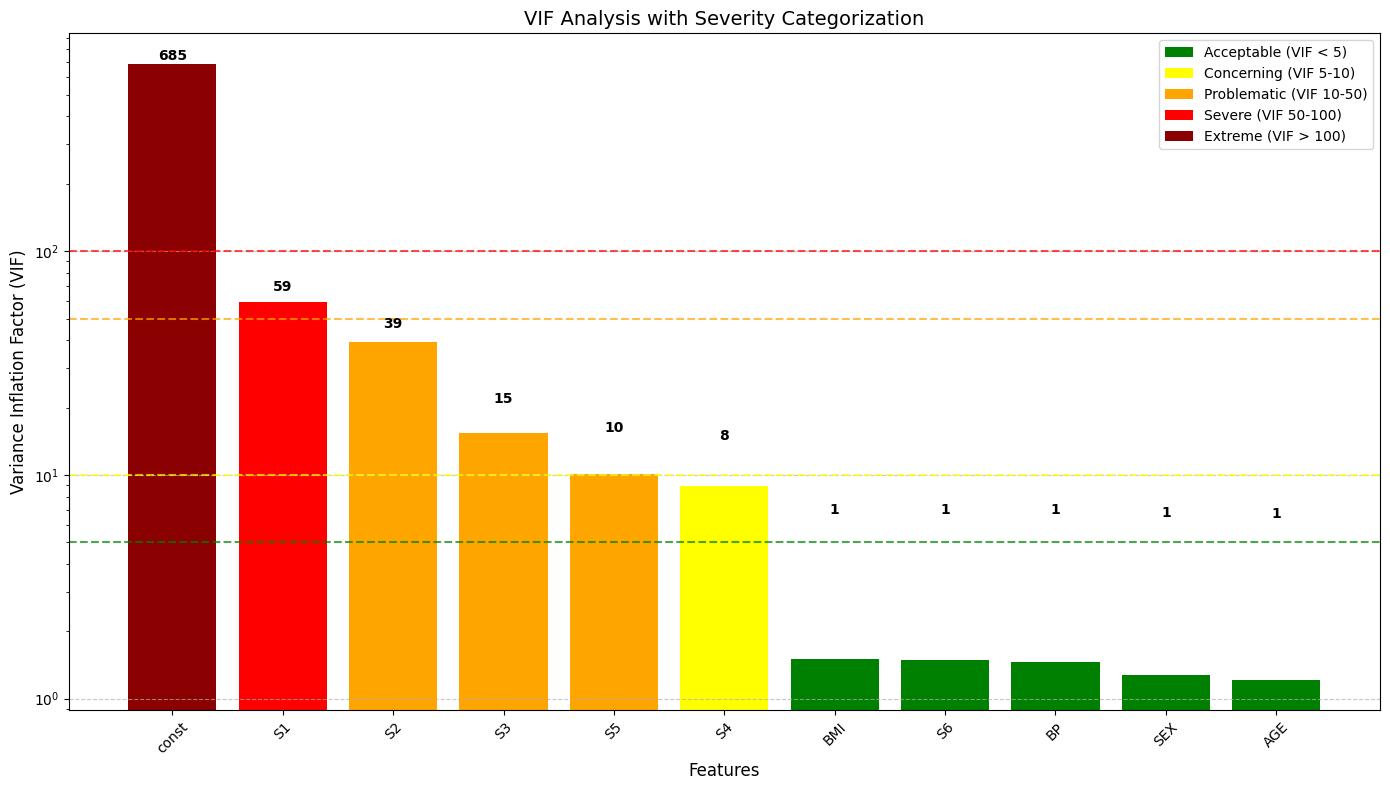

In [56]:
print('*********    Variance Inflation Factor    ****************')

X = df.drop('Y', axis=1)
X = add_constant(X)
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)
# Add severity categories
def categorize_vif(vif_value):
    if vif_value < 5:
        return "Acceptable"
    elif vif_value < 10:
        return "Concerning"
    elif vif_value < 50:
        return "Problematic"
    elif vif_value < 100:
        return "Severe"
    else:
        return "Extreme"

vif_data["Severity"] = vif_data["VIF"].apply(categorize_vif)

vif_data = vif_data.sort_values(by="VIF", ascending=False)

(vif_data)

# Create color map for severity levels
color_map = {
    "Acceptable": "green",
    "Concerning": "yellow",
    "Problematic": "orange",
    "Severe": "red",
    "Extreme": "darkred"
}

# Convert to categorical for proper ordering in the plot
vif_data["Severity"] = pd.Categorical(
    vif_data["Severity"],
    categories=["Acceptable", "Concerning", "Problematic", "Severe", "Extreme"],
    ordered=True
)

plt.figure(figsize=(14, 8))

bars = plt.bar(vif_data["Feature"], vif_data["VIF"], color=[color_map[s] for s in vif_data["Severity"]])

plt.axhline(y=5, color='green', linestyle='--', alpha=0.7, label="Threshold (VIF = 5)")
plt.axhline(y=10, color='yellow', linestyle='--', alpha=0.7, label="Threshold (VIF = 10)")
plt.axhline(y=50, color='orange', linestyle='--', alpha=0.7, label="Threshold (VIF = 50)")
plt.axhline(y=100, color='red', linestyle='--', alpha=0.7, label="Threshold (VIF = 100)")

plt.xlabel("Features", fontsize=12)
plt.ylabel("Variance Inflation Factor (VIF)", fontsize=12)
plt.title("VIF Analysis with Severity Categorization", fontsize=14)
plt.xticks(rotation=45)
plt.yscale('log')  # Log scale to better visualize the differences
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', label='Acceptable (VIF < 5)'),
    Patch(facecolor='yellow', label='Concerning (VIF 5-10)'),
    Patch(facecolor='orange', label='Problematic (VIF 10-50)'),
    Patch(facecolor='red', label='Severe (VIF 50-100)'),
    Patch(facecolor='darkred', label='Extreme (VIF > 100)')
]
plt.legend(handles=legend_elements, loc='upper right')


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height + 5,
        f'{int(height)}',
        ha='center',
        va='bottom',
        rotation=0,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()